# Packages

In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import os

import scipy.stats as stats
from scipy.stats import shapiro

In [5]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [6]:
pd.set_option("display.max_columns", None)

# Data

In [7]:
data_path = "cookie_cats.csv"

In [8]:
def load_data(data_path, info = True):

    if len(data_path.split(".csv")) > 1:
        read = pd.read_csv(data_path)
    elif len(data_path.split(".xlsx")) > 1:
        read = pd.read_excel(data_path)
    
    if info:
        if len(read) > 0:
            print("Data is imported.")
            print("----------------")
            print("Dimensions:")
            print("Rows:", read.shape[0])
            print("Columns:", read.shape[1])
        else:
            print("Data is not imported!")
    return read

ab = load_data(data_path)
ab.head()

Data is imported.
----------------
Dimensions:
Rows: 90189
Columns: 5


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


* userid --> a unique number that identifies each player
* version --> whether the player wa sput in the control group (gate_30) or the test group (gate_40)
* sum_gamerounds --> the number of game rounds played by the player during the first week after installation.
* retention_1 --> did the player come back and play 1 day after installing.
* retention_7 --> did the player come back and play 7 days after installing.

the version is being randomly assigned to the players.

# Statistics

In [9]:
print(ab["userid"].nunique() == ab.shape[0])
print(ab["userid"].nunique())

# There are 90,189 unique players.

True
90189


In [10]:
# for sum_gamerounds variable, summary statistics:
ab.describe([.01, .05, .1, .2, .8, .9, .95, .99])[["sum_gamerounds"]].T

,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
sum_gamerounds,90189.0,51.872457,195.050858,0.0,0.0,1.0,1.0,3.0,16.0,67.0,134.0,221.0,493.0,49854.0


In [11]:
ab.groupby("version")["sum_gamerounds"].agg(["count", "min", "median", "mean", "std", "max"])

,count,min,median,mean,std,max
version,,,,,,
gate_30,44700,0,17.0,52.456264,256.716423,49854
gate_40,45489,0,16.0,51.298776,103.294416,2640


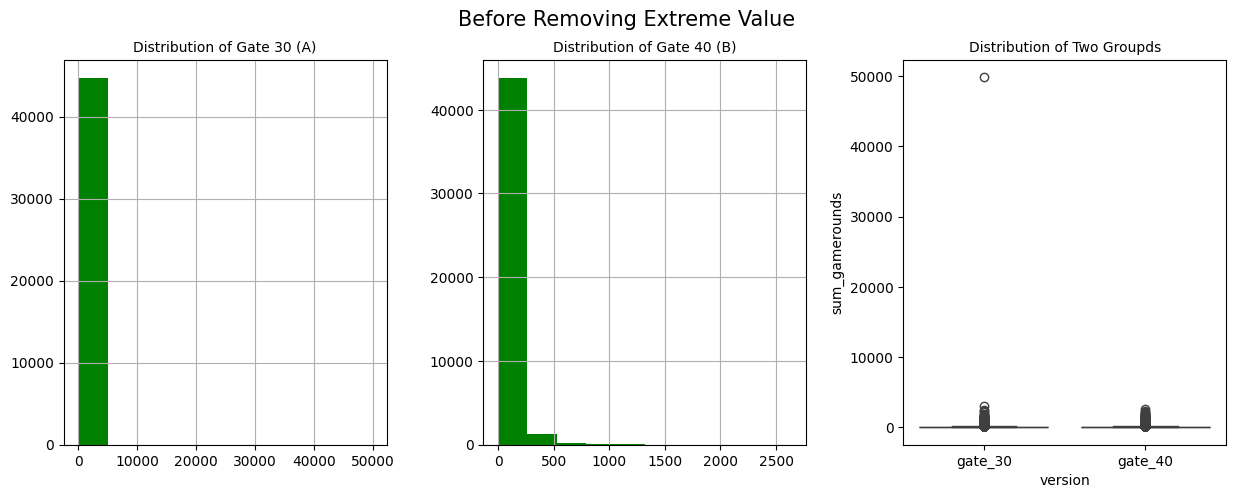

In [12]:
fig, axes = plt.subplots(1, 3, figsize = (15, 5))
ab[(ab["version"] == "gate_30")].hist("sum_gamerounds", ax = axes[0], color = "green")
ab[(ab["version"] == "gate_40")].hist("sum_gamerounds", ax = axes[1], color = "green")
sns.boxplot(x = ab["version"], y = ab["sum_gamerounds"], ax = axes[2])

plt.suptitle("Before Removing Extreme Value", fontsize = 15)
axes[0].set_title("Distribution of Gate 30 (A)", fontsize = 10)
axes[1].set_title("Distribution of Gate 40 (B)", fontsize = 10)
axes[2].set_title("Distribution of Two Groupds", fontsize = 10);

Text(0.5, 0.98, 'Before Removing Extreme Value')

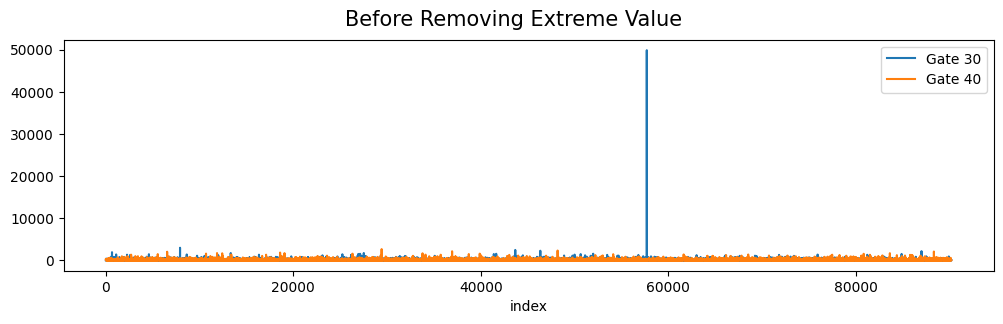

In [13]:
ab[ab["version"] == "gate_30"].reset_index().set_index("index")["sum_gamerounds"].plot(legend = True, label = "Gate 30", figsize = (12, 3))
ab[ab["version"] == "gate_40"].reset_index().set_index("index")["sum_gamerounds"].plot(legend = True, label = "Gate 40")

plt.suptitle("Before Removing Extreme Value", fontsize = 15)

# Outliers

In [14]:
ab = ab[ab["sum_gamerounds"] < ab["sum_gamerounds"].max()]

ab.describe([.01, .5, .1, .2, .8, .9, .99])[["sum_gamerounds"]].T

,count,mean,std,min,1%,10%,20%,50%,80%,90%,99%,max
sum_gamerounds,90188.0,51.320253,102.682719,0.0,0.0,1.0,3.0,16.0,67.0,134.0,493.0,2961.0


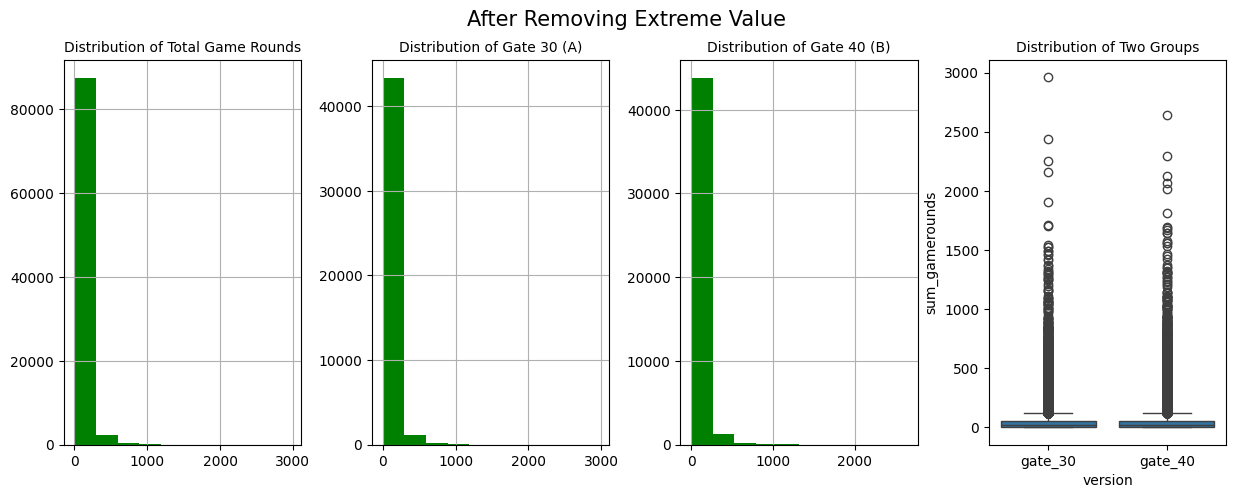

In [15]:
fig, axes = plt.subplots(1, 4, figsize = (15, 5))
ab["sum_gamerounds"].hist(ax = axes[0], color = "green")
ab[(ab["version"] == "gate_30")].hist("sum_gamerounds", ax = axes[1], color = "green")
ab[(ab["version"] == "gate_40")].hist("sum_gamerounds", ax = axes[2], color = "green")
sns.boxplot(x = ab["version"], y = ab["sum_gamerounds"], ax = axes[3])

plt.suptitle("After Removing Extreme Value", fontsize = 15)
axes[0].set_title("Distribution of Total Game Rounds", fontsize = 10)
axes[1].set_title("Distribution of Gate 30 (A)", fontsize = 10)
axes[2].set_title("Distribution of Gate 40 (B)", fontsize = 10)
axes[3].set_title("Distribution of Two Groups", fontsize = 10);

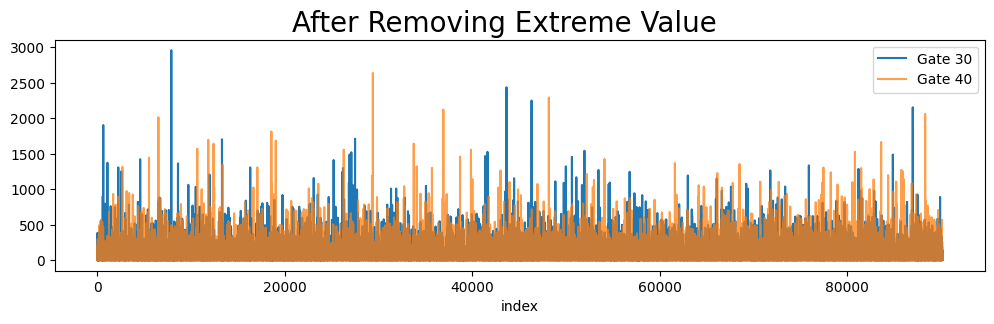

In [16]:
ab[(ab["version"] == "gate_30")].reset_index().set_index("index")["sum_gamerounds"].plot(legend = True, label = "Gate 30", figsize = (12, 3))
ab[(ab["version"] == "gate_40")].reset_index().set_index("index")["sum_gamerounds"].plot(legend = True, label = "Gate 40", alpha = .75)
plt.suptitle("After Removing Extreme Value", fontsize = 20);

# Extra Summary

There are some players who installed the game first, but never played it again.

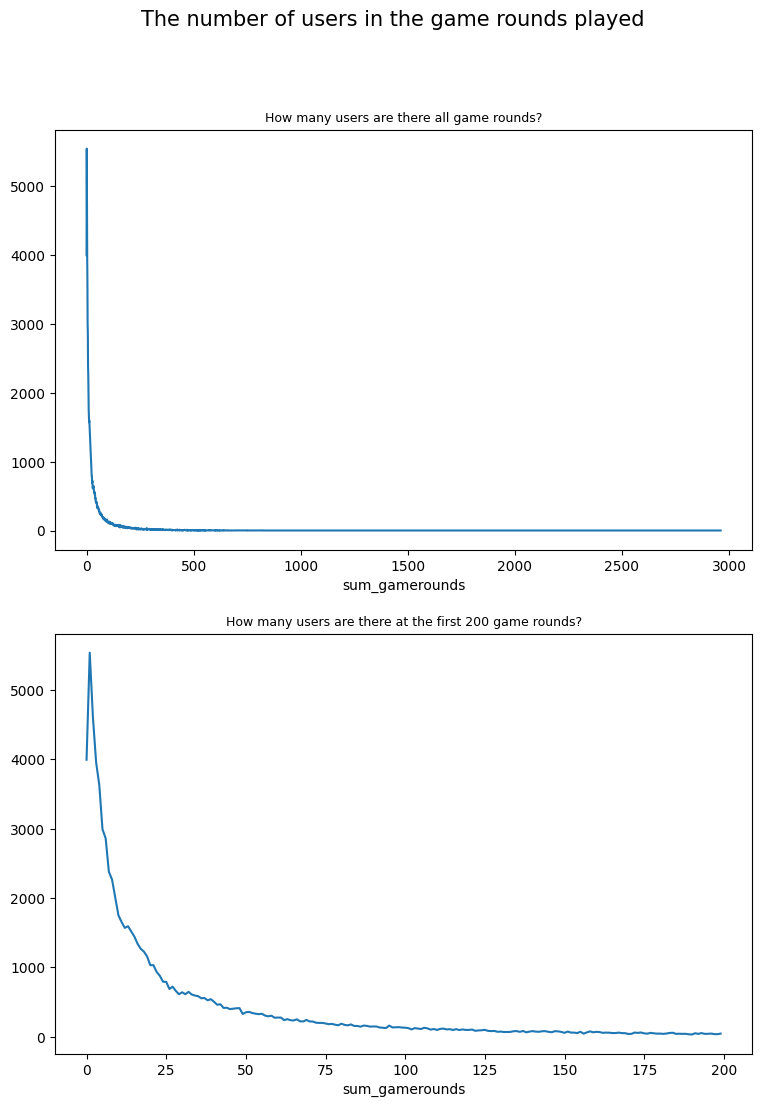

In [17]:
fig, axes = plt.subplots(2, 1, figsize = (9, 12))
ab.groupby("sum_gamerounds")["userid"].count().plot(ax = axes[0])
ab.groupby("sum_gamerounds")["userid"].count()[:200].plot(ax = axes[1])
plt.suptitle("The number of users in the game rounds played", fontsize = 15)
axes[0].set_title("How many users are there all game rounds?", fontsize = 9)
axes[1].set_title("How many users are there at the first 200 game rounds?", fontsize = 9);

In [18]:
ab.groupby("sum_gamerounds")["userid"].count().head(20)

sum_gamerounds
0     3994
1     5538
2     4606
3     3958
4     3629
5     2992
6     2861
7     2379
8     2267
9     2013
10    1752
11    1654
12    1570
13    1594
14    1519
15    1446
16    1342
17    1269
18    1228
19    1158
Name: userid, dtype: int64

In [19]:
# How many users reached gate 30 & gate 40?
ab.groupby("sum_gamerounds")["userid"].count().loc[[30, 40]]

sum_gamerounds
30    642
40    505
Name: userid, dtype: int64

When we check the summary statistics, both groups seem similar. On the other hand, we check whether they are statistically significant.

In [20]:
ab.groupby("version")["sum_gamerounds"].agg(["count", "min", "median", "mean", "std", "max"])

,count,min,median,mean,std,max
version,,,,,,
gate_30,44699,0,17.0,51.342111,102.057598,2961
gate_40,45489,0,16.0,51.298776,103.294416,2640


# Retention

* 55 percent of the players didn't play the game 1 day after installing.
* 81 percent of the players didn't play the game 7 day after installing.

In [21]:
pd.DataFrame({"RET1_COUNT": ab["retention_1"].value_counts(),
              "RET7_COUNT": ab["retention_7"].value_counts(),
              "RET1_RATIO": ab["retention_1"].value_counts() / len(ab),
              "RET7_RATIO": ab["retention_7"].value_counts() / len(ab)})

,RET1_COUNT,RET7_COUNT,RET1_RATIO,RET7_RATIO
False,50035,73408,0.554786,0.813944
True,40153,16780,0.445214,0.186056


* There are similarities in both groups. However, we will check whether there is a statistically significant difference.

In [22]:
ab.groupby(["version", "retention_1"])["sum_gamerounds"].agg(["count", "min", "median", "mean", "std", "max"])

count  min  median       mean         std   max
version retention_1                                                 
gate_30 False        24665    0     6.0  16.359092   36.528426  1072
        True         20034    0    48.0  94.411700  135.037697  2961
gate_40 False        25370    0     6.0  16.340402   35.925756  1241
        True         20119    0    49.0  95.381182  137.887256  2640

In [23]:
ab.groupby(["version", "retention_7"])["sum_gamerounds"].agg(["count", "min", "median", "mean", "std", "max"])

count  min  median        mean         std   max
version retention_7                                                  
gate_30 False        36198    0    11.0   25.796508   43.316158   981
        True          8501    0   105.0  160.117516  179.358560  2961
gate_40 False        37210    0    11.0   25.856356   44.406112  2640
        True          8279    0   111.0  165.649837  183.792499  2294

In [24]:
ab["Retention"] = np.where((ab.retention_1 == True) & (ab.retention_7 == True), 1, 0)
ab.groupby(["version", "Retention"])["sum_gamerounds"].agg(["count", "min", "median", "mean", "std", "max"])

count  min  median        mean         std   max
version Retention                                                  
gate_30 0          38023    0    12.0   28.070273   48.017452  1072
        1           6676    0   127.0  183.886309  189.626390  2961
gate_40 0          38983    0    12.0   28.103353   48.927850  2640
        1           6506    0   133.0  190.282355  194.220077  2294

* The summary statistics are similar here too when the retention variables are combined and the both groups are compared.

In [25]:
ab["NewRetention"] = list(map(lambda x, y: str(x) + "-" + str(y), ab["retention_1"], ab["retention_7"]))
ab.groupby(["version", "NewRetention"])["sum_gamerounds"].agg(["count", "min", "median", "mean", "std", "max"])

count  min  median        mean         std   max
version NewRetention                                                  
gate_30 False-False   22840    0     6.0   11.819746   21.642643   981
        False-True     1825    0    43.0   73.169315   93.222330  1072
        True-False    13358    0    33.0   49.694490   58.125396   918
        True-True      6676    0   127.0  183.886309  189.626390  2961
gate_40 False-False   23597    0     6.0   11.913294   20.901020   547
        False-True     1773    0    47.0   75.261139   94.478048  1241
        True-False    13613    0    32.0   50.025490   60.924587  2640
        True-True      6506    0   133.0  190.282355  194.220077  2294

# A/B Testing

* With statistical tests, we will check the normality, and homogeneity.

In [26]:
ab["version"] = np.where(ab["version"] == "gate_30", "A", "B")
ab.head()

,userid,version,sum_gamerounds,retention_1,retention_7,Retention,NewRetention
0,116,A,3,False,False,0,False-False
1,337,A,38,True,False,0,True-False
2,377,B,165,True,False,0,True-False
3,483,B,1,False,False,0,False-False
4,488,B,179,True,True,1,True-True


In [32]:
def ABtest(df, group, target):

    groupA = df[df[group] == "A"][target]
    groupB = df[df[group] == "B"][target]

    ntA = shapiro(groupA)[1] < .05
    ntB = shapiro(groupB)[1] < .05
    # H0: Distribution is normal.
    # H1: Distribution is not normal.

    if (ntA == False) & (ntB == False):
        leveneTest = stats.levene(groupA, groupB)[1] < .05
        
        if leveneTest == False:
            ttest = stats.ttest_ind(groupA, groupB, equal_var = True)[1]
        
        else:
            ttest = stats.ttest_ind(groupA, groupB, equal_var = False)[1]
    
    else:
        ttest = stats.mannwhitneyu(groupA, groupB)[1]
    
    temp = pd.DataFrame({
        "AB_hypothesis": [ttest < 0.05],
        "p-value": [ttest]
    })

    temp["Test Type"] = np.where((ntA == False) & (ntB == False), "Parametric", "Non-Parametric")
    temp["AB_hypothesis"] = np.where(temp["AB_hypothesis"] == False, "Cannot reject H0", "Reject H0")
    temp["Comment"] = np.where(temp["AB_hypothesis"] == "Cannot reject H0", "A/B are similar!", "A/B are not similar!")

    if(ntA == False) & (ntB == False):
        temp["Homogeneity"] = np.where(leveneTest == False, "Yes", "No")
        temp = temp[["Test Type", "Homogeneity", "AB_hypothesis", "p-value", "Comment"]]
    else:
        temp = temp[["Test Type", "AB_hypothesis", "p-value", "Comment"]]
    
    print("A/B Testing Hypotheses:")
    print("H0: A == B")
    print("H1: A != B")

    return temp

In [33]:
ABtest(df = ab, group = "version", target = "sum_gamerounds")

A/B Testing Hypotheses:
H0: A == B
H1: A != B


,Test Type,AB_hypothesis,p-value,Comment
0,Non-Parametric,Cannot reject H0,0.050892,A/B are similar!


# Conclusion

Summary statistics helped us to understand the data and the problems such as outliers. Before the A/B testing, some details about the players, game, and the problem are shared. After the A/B testing, we have a conclusion that Shapiro test rejects null hypothesis for normality assumption, so we needed to apply a non-parametric test such called as Mann Whitney U. As a result of U test, A/B groups are NOT similar.

* There are statistically significant difference between two groups (Gate_30 and Gate_40) about moving the first gate from the level 30 to level 40 for game rounds.
* 1day and 7days average retention are higher when the gate is at level 30.

In [34]:
ab.groupby("version")["retention_1"].mean(), ab.groupby("version")["retention_7"].mean()

(version
 A    0.448198
 B    0.442283
 Name: retention_1, dtype: float64,
 version
 A    0.190183
 B    0.182000
 Name: retention_7, dtype: float64)